<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/Avocado_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Module and CSV files
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Avocado_Price/avocado.csv')

In [2]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


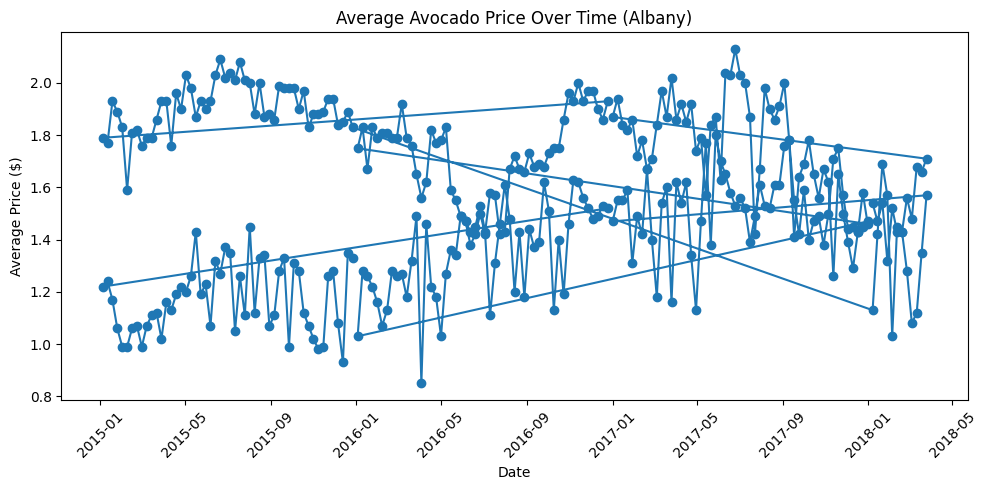

In [6]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Filter for Albany region only
albany_df = df[df['region'] == 'Albany']

# 1. Average Price Over Time
plt.figure(figsize=(10, 5))
plt.plot(albany_df['Date'], albany_df['AveragePrice'], marker='o')
plt.title('Average Avocado Price Over Time (Albany)')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

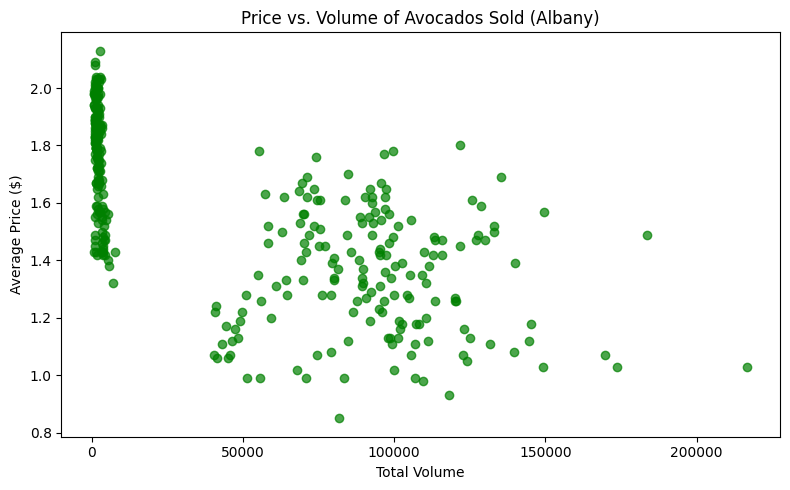

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(albany_df['Total Volume'], albany_df['AveragePrice'], alpha=0.7, color='green')
plt.title('Price vs. Volume of Avocados Sold (Albany)')
plt.xlabel('Total Volume')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

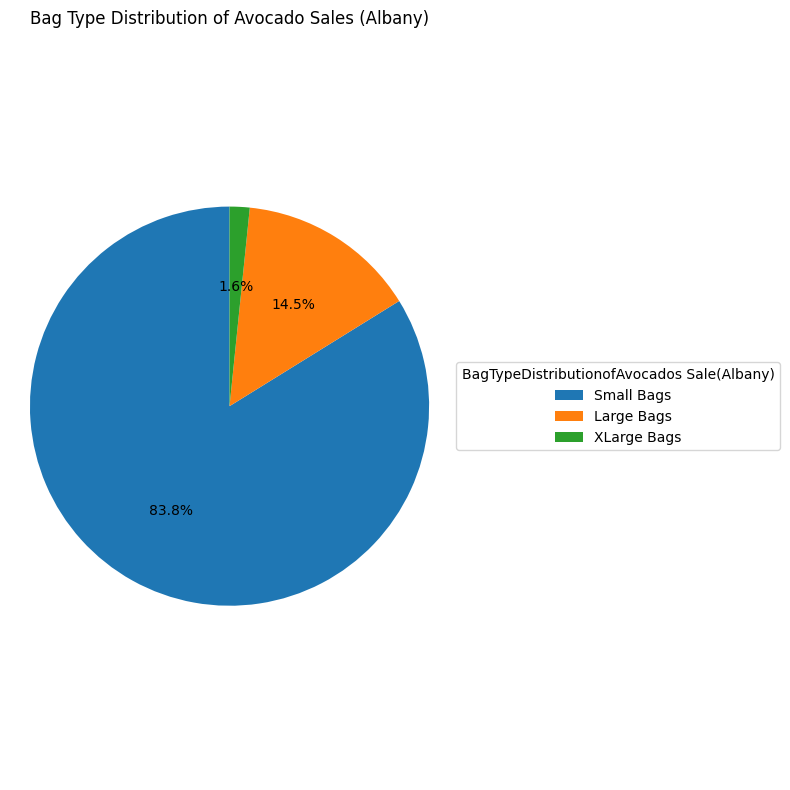

In [12]:
total_bags = albany_df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_bags, labels=None, autopct='%1.1f%%', startangle=90)
plt.legend(total_bags.index, title="BagTypeDistributionofAvocados Sale(Albany)", bbox_to_anchor=(1, 0.5), loc="center left")
plt.title('Bag Type Distribution of Avocado Sales (Albany)')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
df['volume_per_small_bag'] = df['Small Bags'] / df['Total Volume']
df['volume_per_large_bag'] = df['Large Bags'] / df['Total Volume']
df['volume_per_xlarge_bag'] = df['XLarge Bags'] / df['Total Volume']

In [10]:
df['volume_per_large_bag']

,volume_per_large_bag
0,0.001452
1,0.001777
2,0.000872
3,0.001693
4,0.003873
...,...
18244,0.025292
18245,0.023387
18246,0.003073
18247,0.003085
